<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Install Packages</h2>
</div>

In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import OrderedDict

from IPython.display import display, Markdown, clear_output, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:,.4f}'.format

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Project Overview</h2>
</div>

<h2> Problem Description </h2>
Our goal is to predict the <code>total_cases</code> label for each <code>city</code>, <code>year</code> and <code>weekofyear</code> in the datset. There are 2 cities, San Juan, <b>sj</b> and Iquitos, <b>iq</b>, with the data spanning from period of 2001 to 2021.


<h2> List of Features </h2>
We are provided the following information on a <code>year</code> & <code>weekofyear</code> timescale:

1. <font size="3px" face="Dosis" color=""><b>City & Date Indicators</b></font>
    - <code>city</code>: City abbreviations : <b>sj</b> for San Juan and <b>iq</b> for Iquitos
    - <code>week_start_date</code> : Date given in <b>yyyy-mm-dd</b> format
2. <font size="3px" face="Dosis"><b>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</b></font>
    - <code>precipitation_amt_mm</code> : Total precipitation
3. <font size="3px" face="Dosis"><b>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</b></font>
    - <code>reanalysis_sat_precip_amt_mm</code> : Total precipitation
    - <code>reanalysis_dew_point_temp_k</code> : Mean dew point temperature
    - <code>reanalysis_air_temp_k</code> : Mean air temperature
    - <code>reanalysis_relative_humidity_percent</code> : Mean relative humidity
    - <code>reanalysis_specific_humidity_g_per_kg</code> : Mean specific humidity
    - <code>reanalysis_precip_amt_kg_per_m2</code> : Total precipitation
    - <code>reanalysis_max_air_temp_k</code> : Maximum air temperature
    - <code>reanalysis_min_air_temp_k</code> : Minimum air temperature
    - <code>reanalysis_avg_temp_k</code> : Average air temperature
    - <code>reanalysis_tdtr_k</code> : Diurnal temperature range
3. <font size="3px" face="Dosis"><b>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</b></font>
    - <code>ndvi_se</code> : Pixel <b>southeast</b> of city centroid
    - <code>ndvi_sw</code> : Pixel <b>southwest</b> of city centroid
    - <code>ndvi_ne</code> : Pixel <b>northeast</b> of city centroid
    - <code>ndvi_nw</code> : Pixel <b>northwest</b> of city centroid

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Import Data</h2>
</div>

display(Markdown('<a id="top"></a>'))
sections = ["Dengue"]
loading_section = ['Loading Data']
analysis_summary_section = ["Description"]

sub_sections = ["Data Summary", "Missing Analysis", "Outlier Analysis"]
    
accordions = OrderedDict()
accordions["-= Loading =-"] = widgets.Accordion(children=[widgets.Output() for section in loading_section])
[accordions["-= Loading =-"].set_title(i, section) for i, section in enumerate(loading_section)]

accordions["Project Summary"] = widgets.Accordion(children=[widgets.Output() for section in analysis_summary_section])
[accordions["Project Summary"].set_title(i, section) for i, section in enumerate(analysis_summary_section)]

for section in sections:
        accordions[section] = widgets.Accordion(children=[widgets.Output() for sub_section in sub_sections])
        [accordions[section].set_title(i, sub_section) for i, sub_section in enumerate(sub_sections)]

overview_sections = ["Summary", "Feature Dependency"]
accordions["-= Summary =-"] = widgets.Accordion(children=[widgets.Output() for section in overview_sections])
[accordions["-= Summary =-"].set_title(i, section) for i, section in enumerate(overview_sections)]

tab_fields = widgets.Tab(children=[accordions[v] for v in accordions])
[tab_fields.set_title(i, s) for i, s in enumerate(accordions.keys())];

tab_fields

In [43]:
def year_change(year):
    if year == "1990":
        return 2001
    elif year == "1991":
        return 2002
    elif year == "1992" :
        return 2003
    elif year == "1993" :
        return 2004
    elif year == "1994":
        return 2005
    elif year == "1995":
        return 2006
    elif year == "1996":
        return 2007
    elif year == "1997":
        return 2008
    elif year == "1998":
        return 2009
    elif year == "1999":
        return 2010
    elif year == "2000":
        return 2011
    elif year == "2001":
        return 2012
    elif year == "2002":
        return 2013
    elif year == "2003":
        return 2014
    elif year == "2004":
        return 2015
    elif year == "2005":
        return 2016
    elif year == "2006":
        return 2017
    elif year == "2007":
        return 2018
    elif year == "2008":
        return 2019
    elif year == "2009":
        return 2020
    elif  "2010" in year:
        return 2021
    else:
        return "year invalid..."
    
REPLACE_YEAR = {
    "1990" : "2001",
    "1991" : "2002",
    "1992" : "2003",
    "1993" : "2004",
    "1994" : "2005",
    "1995" : "2006",
    "1996" : "2007",
    "1997" : "2008",
    "1998" : "2009",
    "1999" : "2010",
    "2000" : "2011",
    "2001" : "2012",
    "2002" : "2013",
    "2003" : "2014",
    "2004" : "2015",
    "2005" : "2016",
    "2006" : "2017",
    "2007" : "2018",
    "2008" : "2019",
    "2009" : "2020",
    "2010" : "2021",
}

In [180]:
!curl https://github.com/KewJS/Dengue-Prediction/blob/main/data/dengue_features_train.csv -o data/dengue_features_train.csv
!curl https://github.com/KewJS/Dengue-Prediction/blob/main/data/dengue_labels_train.csv -o data/dengue_labels_train.csv
!curl https://github.com/KewJS/Dengue-Prediction/blob/main/data/dengue_features_test.csv -o data/dengue_features_test.csv
!curl https://github.com/KewJS/Dengue-Prediction/blob/main/data/submission_format.csv -o data/submission_format.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1416k    0 1416k    0     0  1416k      0 --:--:--  0:00:01 --:--:--  974k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  523k    0  523k    0     0   523k      0 --:--:-- --:--:-- --:--:--  669k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:

In [183]:
BASE_DIR = pathlib.Path().resolve()
DATASET_DIR = BASE_DIR / "data"
EXPORT_DIR = DATASET_DIR / "exports"

In [184]:
train_features_df = pd.read_csv(DATASET_DIR / 'dengue_features_train.csv')
train_labels_df = pd.read_csv(DATASET_DIR / 'dengue_labels_train.csv')

In [46]:
train_df = train_features_df.merge(train_labels_df, on=["city", "year", "weekofyear"], how="left")

In [47]:
train_df["year"] = train_df["year"].astype(str).apply(lambda x: year_change(x))

for key, value in REPLACE_YEAR.items():
    train_df["week_start_date"] = train_df["week_start_date"].str.replace(key, value)
    
train_df["week_start_date"] = pd.to_datetime(train_df["week_start_date"])

<font size="5px" face="sans-serif"><ins>Feature Data Understanding</ins></font>

In [59]:
display(train_df.head())
display(Markdown("There are a total of $1456$ number of observations in input data samples."))
display(train_df.info())

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2001,18,2012-04-30,0.1226,0.1037,0.1985,0.1776,12.4200,297.5729,297.7429,292.4143,299.8000,295.9000,32.0000,73.3657,12.4200,14.0129,2.6286,25.4429,6.9000,29.4000,20.0000,16.0000,4
1,sj,2001,19,2012-05-07,0.1699,0.1422,0.1624,0.1555,22.8200,298.2114,298.4429,293.9514,300.9000,296.4000,17.9400,77.3686,22.8200,15.3729,2.3714,26.7143,6.3714,31.7000,22.2000,8.6000,5
2,sj,2001,20,2012-05-14,0.0323,0.1730,0.1572,0.1708,34.5400,298.7814,298.8786,295.4343,300.5000,297.3000,26.1000,82.0529,34.5400,16.8486,2.3000,26.7143,6.4857,32.2000,22.8000,41.4000,4
3,sj,2001,21,2012-05-21,0.1286,0.2451,0.2276,0.2359,15.3600,298.9871,299.2286,295.3100,301.4000,297.0000,13.9000,80.3371,15.3600,16.6729,2.4286,27.4714,6.7714,33.3000,23.3000,4.0000,3
4,sj,2001,22,2012-05-28,0.1962,0.2622,0.2512,0.2473,7.5200,299.5186,299.6643,295.8214,301.9000,297.5000,12.2000,80.4600,7.5200,17.2100,3.0143,28.9429,9.3714,35.0000,23.9000,5.8000,6


There are a total of $1456$ number of observations in input data samples.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

None

<font size="5px" face="sans-serif"><ins>Target Variable: <code>total_cases</code></ins></font>

In [122]:
def horizontal_bar_plot(df, var, normalize=True, title=None):
    var_df = df[var].value_counts(normalize=normalize).reset_index().rename(columns={'index': 'category'})
    n_colors = len(var_df)

    fig, ax = plt.subplots(figsize=(15,3))
    sns.barplot(x=var, y="category", data=var_df, ax=ax)
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("City", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.tick_params(axis="y", which='major', labelsize=14)
    ax.tick_params(axis="y", which='minor', labelsize=14)
    ax.tick_params(axis="x", which='major', labelsize=14)
    ax.tick_params(axis="x", which='minor', labelsize=14)

    return plt.show()


def vertical_bar_plot(df, label_var, var, normalize=True, title=None):
    fig, ax = plt.subplots(figsize=(15,3))
    sns.barplot(x=label_var, y=var, data=df, ax=ax)
    ax.set_title(title, fontsize=16, weight="bold")
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel("Count", fontsize=14)

    return plt.show()


def line_plot(df, x_var, y_var, title=None):
    fig, ax = plt.subplots(figsize=(15,3))
    plt.plot(pd.to_datetime(df[x_var]), df[y_var], color="black")
    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    ax.grid()

    return plt.show()


def distribution_plot(df, x_var, title=None):
    fig, ax = plt.subplots(figsize=(15,3))
    sns.distplot(df[x_var], bins=50, ax=ax)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(x_var)
    ax.set_ylabel("Density")
    ax.grid()
    
    return plt.show()

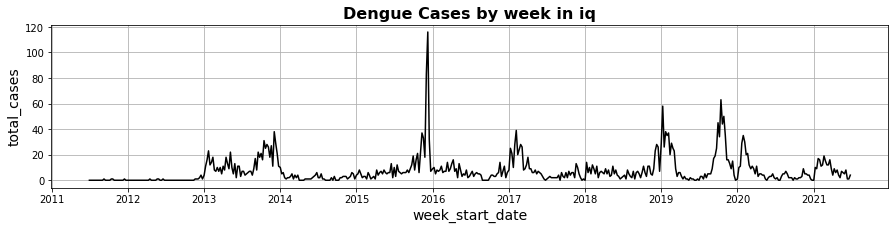

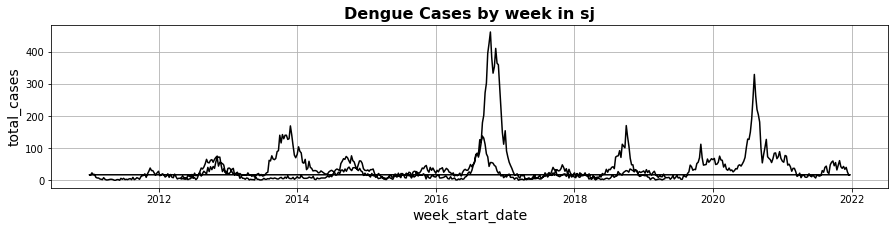

In [123]:
for city, data in train_df.groupby(["city"]):
    line_plot(data, "week_start_date", "total_cases", title="Dengue Cases by week in {}".format(city))

We can notice that the distribution of <code>total_cases</code> of dengues are different between 2 cities. Besides, the values problems and cleaning processes would also be different between 2 cities. Hence, we will <b>separate</b> the data into 2 different cities and treat the data separately.

In [143]:
sj_train_df = train_df[train_df["city"]=="sj"]
display(Markdown("<b>sj</b> dataset: {}".format(sj_train_df.shape)))

iq_train_df = train_df[train_df["city"]=="iq"]
display(Markdown("<b>iq</b> dataset: {}".format(iq_train_df.shape)))

<b>sj</b> dataset: (936, 25)

<b>iq</b> dataset: (520, 25)

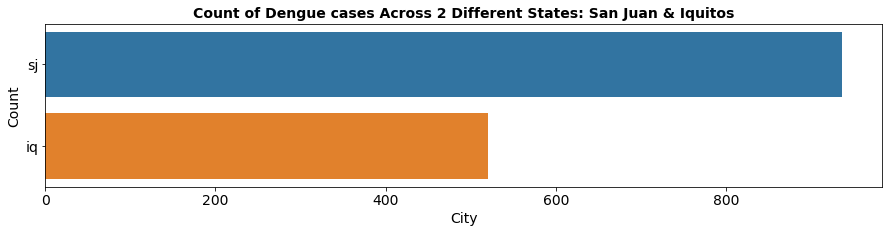

In [144]:
horizontal_bar_plot(train_df, "city", normalize=False, title="Count of Dengue cases Across 2 Different States: San Juan & Iquitos")

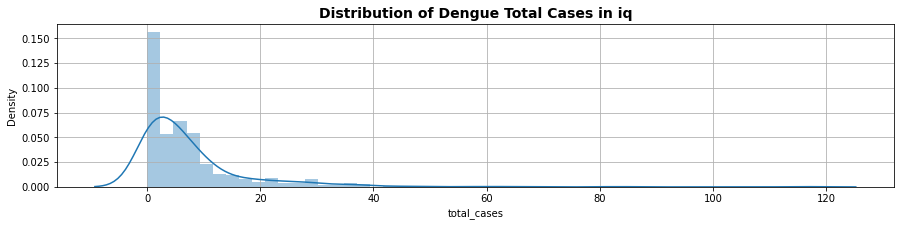

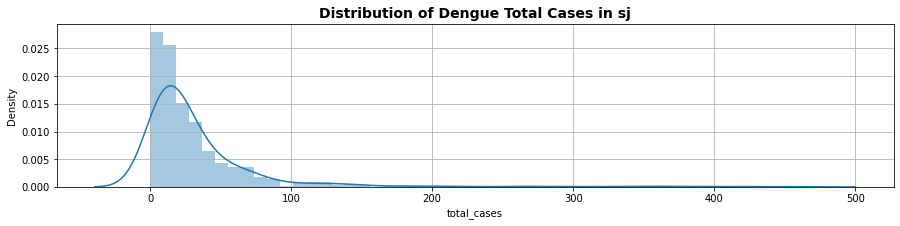

<p>Our target variable is not <b>normal</b>, perhaps some resampling to a much normally distributed data is required.</p>

In [145]:
for city, data in train_df.groupby(["city"]):
    distribution_plot(data, "total_cases", title="Distribution of Dengue Total Cases in {}".format(city))
    
display(Markdown("<p>Our target variable is not <b>normal</b>, perhaps some resampling to a much normally distributed data is required.</p>"))

In [ ]:
data consistency
data 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Quantity Checking</h2>
</div>

<font size="5px" face="sans-serif"><ins>Data Consistency Handling</ins></font>

- <font size="3px" face="sans-serif"><b>sj</b> city data</font>

In [175]:
sj_train_df["weekofyear"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

In [148]:
for year in sj_train_df["year"].unique():
    print(f'{year} max: {max(sj_train_df[sj_train_df["year"]==year]["weekofyear"])}\
      | min: {min(sj_train_df[sj_train_df["year"]==year]["weekofyear"])}\
      | uniques: {sj_train_df[sj_train_df["year"]==year]["weekofyear"].nunique()}')
    
display(Markdown("""Some weeks have a mistaken weeknumber value, since the max for some years \
(eg. $2004$, $2010$, $2016$) is 53 despite still only having 52 unique weeks:
"""))

2001 max: 52      | min: 18      | uniques: 35
2002 max: 52      | min: 1      | uniques: 52
2003 max: 52      | min: 1      | uniques: 52
2004 max: 53      | min: 1      | uniques: 52
2005 max: 52      | min: 1      | uniques: 52
2006 max: 52      | min: 1      | uniques: 52
2007 max: 52      | min: 1      | uniques: 52
2008 max: 52      | min: 1      | uniques: 52
2009 max: 52      | min: 1      | uniques: 52
2010 max: 53      | min: 1      | uniques: 52
2011 max: 52      | min: 1      | uniques: 52
2012 max: 52      | min: 1      | uniques: 52
2013 max: 52      | min: 1      | uniques: 52
2014 max: 52      | min: 1      | uniques: 52
2015 max: 52      | min: 1      | uniques: 52
2016 max: 53      | min: 1      | uniques: 52
2017 max: 52      | min: 1      | uniques: 52
2018 max: 52      | min: 1      | uniques: 52
2019 max: 17      | min: 1      | uniques: 17


Some weeks have a mistaken weeknumber value, since the max for some years (eg. $2004$, $2010$, $2016$) is 53 despite still only having 52 unique weeks:


A closer look shows that it's the first week of the year that is registering as week 53:

In [149]:
for year in [2004, 2010, 2016]:
    display(sj_train_df[sj_train_df["year"]==year][["city", "year", "weekofyear", "week_start_date"]].head(3))
    
display(Markdown("""This error on <b>labelling the first week of the year as $53$</b> will be corrected using these 2 steps:
<ul>
    <li>incrementing all the week values by one. This would make the first week 54, and the rest of the weeks should be correct</li>
    <li>reduce any week values over 52 (i.e. the first week only) to 1.</li>
</ul>
"""))

,city,year,weekofyear,week_start_date
139,sj,2004,53,2015-01-01
140,sj,2004,1,2015-01-08
141,sj,2004,2,2015-01-15


,city,year,weekofyear,week_start_date
451,sj,2010,53,2021-01-01
452,sj,2010,1,2021-01-08
453,sj,2010,2,2021-01-15


,city,year,weekofyear,week_start_date
763,sj,2016,53,2016-01-01
764,sj,2016,1,2016-01-08
765,sj,2016,2,2016-01-15


This error on <b>labelling the first week of the year as $53$</b> will be corrected using these 2 steps:
<ul>
    <li>incrementing all the week values by one. This would make the first week 54, and the rest of the weeks should be correct</li>
    <li>reduce any week values over 52 (i.e. the first week only) to 1.</li>
</ul>


In [154]:
display(Markdown("Increment all week values by one for all problem years"))
# sj_train_df.loc[:, "weekofyear_fixed"] = np.where(sj_train_df["year"]==2004, 
#                                                   sj_train_df["weekofyear"]+1, 
#                                                   sj_train_df["weekofyear"])
for year in [2004, 2010, 2016]:
    sj_train_df.loc[:,'weekofyear_fixed'] = np.where(sj_train_df["year"]==year,
                                                     sj_train_df["weekofyear_fixed"]+1, 
                                                     sj_train_df["weekofyear_fixed"])

display(Markdown("Reduce any week values over $52$ down to $1$"))
sj_train_df.loc[:,'weekofyear_fixed'] = np.where(sj_train_df["weekofyear_fixed"]>52,
                                                 1, 
                                                 sj_train_df["weekofyear_fixed"])

for year in sj_train_df["year"].unique():
    print(f'{year} max: {max(sj_train_df[sj_train_df["year"]==year]["weekofyear_fixed"])}\
  | min: {min(sj_train_df[sj_train_df["year"]==year]["weekofyear_fixed"])}\
  | uniques: {sj_train_df[sj_train_df["year"]==year]["weekofyear_fixed"].nunique()}')

Increment all week values by one for all problem years

Reduce any week values over $52$ down to $1$

2001 max: 52  | min: 18  | uniques: 35
2002 max: 52  | min: 1  | uniques: 52
2003 max: 52  | min: 1  | uniques: 52
2004 max: 52  | min: 1  | uniques: 52
2005 max: 52  | min: 1  | uniques: 52
2006 max: 52  | min: 1  | uniques: 52
2007 max: 52  | min: 1  | uniques: 52
2008 max: 52  | min: 1  | uniques: 52
2009 max: 52  | min: 1  | uniques: 52
2010 max: 52  | min: 1  | uniques: 52
2011 max: 52  | min: 1  | uniques: 52
2012 max: 52  | min: 1  | uniques: 52
2013 max: 52  | min: 1  | uniques: 52
2014 max: 52  | min: 1  | uniques: 52
2015 max: 52  | min: 1  | uniques: 52
2016 max: 52  | min: 1  | uniques: 52
2017 max: 52  | min: 1  | uniques: 52
2018 max: 52  | min: 1  | uniques: 52
2019 max: 17  | min: 1  | uniques: 17


- <font size="3px" face="sans-serif"><b>iq</b> city data</font>

In [159]:
for year in iq_train_df["year"].unique():
    print(f'{year} max: {max(iq_train_df[iq_train_df["year"]==year]["weekofyear"])}\
      | min: {min(iq_train_df[iq_train_df["year"]==year]["weekofyear"])}\
      | uniques: {iq_train_df[iq_train_df["year"]==year]["weekofyear"].nunique()}')
    
display(Markdown("""Some weeks have a mistaken weeknumber value, since the max for some years \
(eg. $2016$, $2021$) is 53 despite still only having 52 unique weeks:
"""))

2011 max: 51      | min: 26      | uniques: 26
2012 max: 52      | min: 1      | uniques: 52
2013 max: 52      | min: 1      | uniques: 52
2014 max: 52      | min: 1      | uniques: 52
2015 max: 52      | min: 1      | uniques: 52
2016 max: 53      | min: 1      | uniques: 52
2017 max: 52      | min: 1      | uniques: 52
2018 max: 52      | min: 1      | uniques: 52
2019 max: 52      | min: 1      | uniques: 52
2020 max: 52      | min: 1      | uniques: 52
2021 max: 53      | min: 1      | uniques: 26


Some weeks have a mistaken weeknumber value, since the max for some years (eg. $2016$, $2021$) is 53 despite still only having 52 unique weeks:


A closer look shows that it's the first week of the year that is registering as week 53:

In [160]:
for year in [2016, 2021]:
    display(iq_train_df[iq_train_df["year"]==year][["city", "year", "weekofyear", "week_start_date"]].head(3))
    
display(Markdown("""This error on <b>labelling the first week of the year as $53$</b> will be corrected using these 2 steps:
<ul>
    <li>incrementing all the week values by one. This would make the first week 54, and the rest of the weeks should be correct</li>
    <li>reduce any week values over 52 (i.e. the first week only) to 1.</li>
</ul>
"""))

,city,year,weekofyear,week_start_date
1170,iq,2016,53,2016-01-01
1171,iq,2016,1,2016-01-08
1172,iq,2016,2,2016-01-15


,city,year,weekofyear,week_start_date
1430,iq,2021,53,2021-01-01
1431,iq,2021,1,2021-01-08
1432,iq,2021,2,2021-01-15


This error on <b>labelling the first week of the year as $53$</b> will be corrected using these 2 steps:
<ul>
    <li>incrementing all the week values by one. This would make the first week 54, and the rest of the weeks should be correct</li>
    <li>reduce any week values over 52 (i.e. the first week only) to 1.</li>
</ul>


In [162]:
display(Markdown("Increment all week values by one for all problem years"))
iq_train_df.loc[:, "weekofyear_fixed"] = np.where(iq_train_df["year"]==2016,
                                                  iq_train_df["weekofyear"]+1,
                                                  iq_train_df["weekofyear"])
iq_train_df.loc[:, "weekofyear_fixed"] = np.where(iq_train_df["year"]==2021,
                                                  iq_train_df["weekofyear_fixed"]+1,
                                                  iq_train_df["weekofyear_fixed"])

display(Markdown("Reduce any week values over $52$ down to $1$"))
iq_train_df.loc[:,'weekofyear_fixed'] = np.where(iq_train_df["weekofyear_fixed"]>52,
                                                 1, 
                                                 iq_train_df["weekofyear_fixed"])

for year in iq_train_df["year"].unique():
    print(f'{year} max: {max(iq_train_df[iq_train_df["year"]==year]["weekofyear_fixed"])}\
  | min: {min(iq_train_df[iq_train_df["year"]==year]["weekofyear_fixed"])}\
  | uniques: {iq_train_df[iq_train_df["year"]==year]["weekofyear_fixed"].nunique()}')

Increment all week values by one for all problem years

Reduce any week values over $52$ down to $1$

2011 max: 51  | min: 26  | uniques: 26
2012 max: 52  | min: 1  | uniques: 52
2013 max: 52  | min: 1  | uniques: 52
2014 max: 52  | min: 1  | uniques: 52
2015 max: 52  | min: 1  | uniques: 52
2016 max: 52  | min: 1  | uniques: 52
2017 max: 52  | min: 1  | uniques: 52
2018 max: 52  | min: 1  | uniques: 52
2019 max: 52  | min: 1  | uniques: 52
2020 max: 52  | min: 1  | uniques: 52
2021 max: 26  | min: 1  | uniques: 26


<font size="5px" face="sans-serif"><ins>Missing Values Checking</ins></font>

In [146]:
display(pd.isnull(train_df).any())

display(Markdown("""There are misisng values across the dataframe, besides from <code>city</code>, <code>year</code>, \
<code>weekofyear</code>, <code>week_start_date</code> and <code>total_cases</code>.
"""))

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

There are misisng values across the dataframe, besides from <code>city</code>, <code>year</code>, <code>weekofyear</code>, <code>week_start_date</code> and <code>total_cases</code>.


In [165]:
def missingno_matrix(df, title):
    fig, ax = plt.subplots(figsize=(15,5))
    msno.matrix(df, ax=ax)
    ax.set_title(title, fontsize=16, fontweight="bold")
    
    return plt.show()

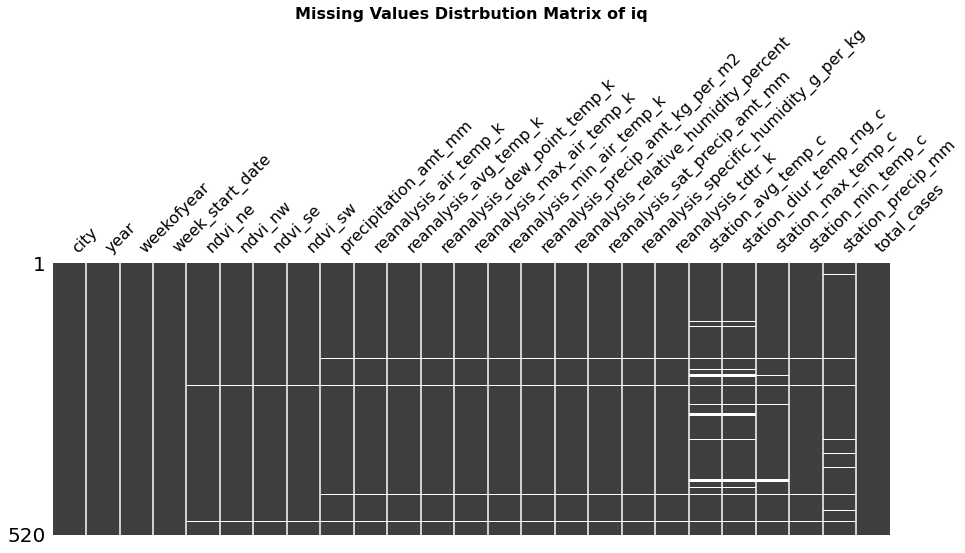

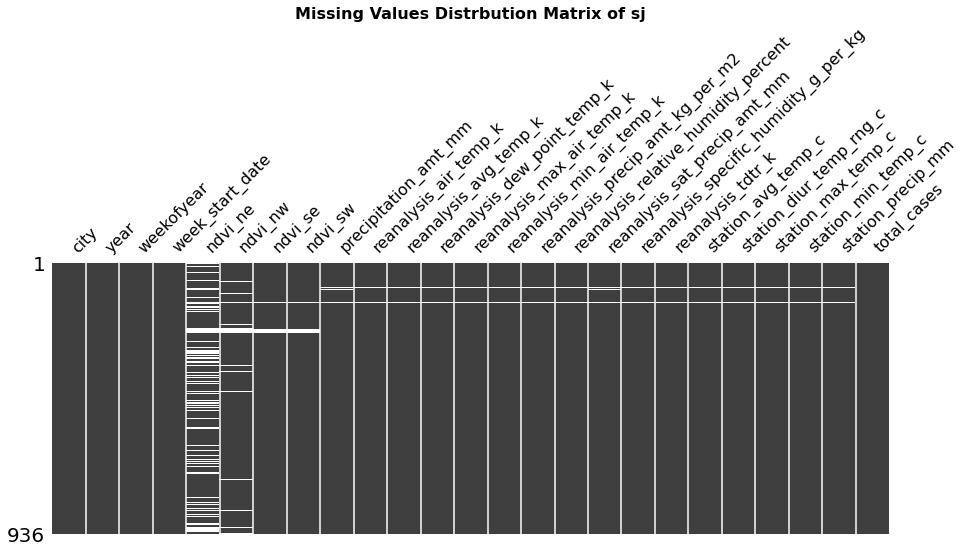

<p>Missing values present across the data in both cities but the missing values are not severe.</p>

In [166]:
for city, data in train_df.groupby(["city"]):
    missingno_matrix(data, "Missing Values Distrbution Matrix of {}".format(city))
    
display(Markdown("<p>Missing values present across the data in both cities but the missing values are not severe.</p>"))

In [170]:
display(Markdown("Fill in missing values using <b>interpolation</b> method across both city"))

sj_train_df = sj_train_df.interpolate(method="ffill").interpolate(method="bfill")
display(Markdown("<b>sj</b> dataset missing values: {}".format(sj_train_df.isnull().sum())))

iq_train_df = iq_train_df.interpolate(method="ffill").interpolate(method="bfill")
display(Markdown("<b>iq</b> dataset missing values: {}".format(iq_train_df.isnull().sum())))

Fill in missing values using <b>interpolation</b> method across both city

<b>sj</b> dataset missing values: city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
weekofyear_fixed                         0
dtype: int64

<b>iq</b> dataset missing values: city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
weekofyear_fixed                         0
dtype: int64

<font size="5px" face="sans-serif"><ins>Outliers Data Handling</ins></font>

In [ ]:
sj_train_df